In [126]:
import warnings
warnings.filterwarnings("ignore")

In [127]:
# Standard Libaries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn

In [128]:
# Reading the data
d1 = pd.read_csv("Item_details.csv")
d2 = pd.read_csv("Store_details.csv")
d3 = pd.read_csv("sales_data.csv")
d4 = pd.read_csv("wastage_data.csv")

In [129]:
# Merging the data
data1 = pd.merge(d3,d4,on=["Location_ID","Product_ID","Transaction_Date"])
data2 = pd.merge(data1,d1,on=["Product_ID"])
df= pd.merge(data2,d2,on=['Location_ID'])
df = df[df['Location_ID']==202]

In [130]:
df.drop(["City","TotalArea_SqFt","City","Address","Location_ID","Store_Name"],axis=1,inplace = True)


In [131]:
df['Date'] = pd.to_datetime(df['Transaction_Date'])

In [132]:
df['year'] = df['Date'].dt.year

In [133]:
df.index = pd.to_datetime(df['Transaction_Date'])

In [134]:
# Convert the date column to datetime data type
df["Transaction_Date"] = pd.to_datetime(df["Transaction_Date"])

# Extract month and day into separate columns
df["Day"] = df["Transaction_Date"].dt.day

#removing the transaction date
df.drop(['Transaction_Date'],axis=1,inplace=True)

In [135]:
# Month and Day of Week Features
df['month'] = df.index.month
df['day_of_week'] = df.index.dayofweek

In [136]:
df['Moving_Average'] = df['Qty_Sold'].rolling(window=3, min_periods=1).mean()
df.isnull().sum()

Product_ID             0
Sales_Value            0
Qty_Sold               0
Total_Transactions     0
Wastage_QTY            0
Wastage_Value          0
Product_Description    0
Category               0
Seasonality            0
SubCategory            0
Shelf Life in days     0
Date                   0
year                   0
Day                    0
month                  0
day_of_week            0
Moving_Average         0
dtype: int64

In [137]:
alpha = 0.5
df['Exponential_Moving_Average'] = df['Qty_Sold'].ewm(alpha=0.5, adjust=False).mean()
df

Product_ID  Sales_Value  Qty_Sold  Total_Transactions   
Transaction_Date                                                          
2017-06-16            100701       44.100     1.000               397.0  \
2017-06-17            100701       49.000     1.000              1275.0   
2017-06-18            100701       93.100     2.000              1165.0   
2017-06-20            100701        0.000     0.000               389.0   
2017-06-26            100701        0.000     0.000               780.0   
...                      ...          ...       ...                 ...   
2019-11-03            101200       28.906     0.194               975.0   
2019-11-05            101200        0.000     0.000               314.0   
2019-11-06            101200       46.637     0.313               605.0   
2019-11-09            101200        0.000     0.000              1024.0   
2019-11-12            101200        0.000     0.000               290.0   

                  Wastage_QTY  Wastage_Value  Product_Description   Category   
Transaction_Date                                                               
2017-06-16              0.000         0.0000  Almond Fresh Punnet      Fruit  \
2017-06-17              0.000         0.0000  Almond Fresh Punnet      Fruit   
2017-06-18              0.000         0.0000  Almond Fresh Punnet      Fruit   
2017-06-20             -4.000      -152.0000  Almond Fresh Punnet      Fruit   
2017-06-26             -1.000       -38.0000  Almond Fresh Punnet      Fruit   
...                       ...            ...                  ...        ...   
2019-11-03              0.000         0.0000      Zucchini Yellow  Vegetable   
2019-11-05             -1.298       -92.7482      Zucchini Yellow  Vegetable   
2019-11-06              0.000         0.0000      Zucchini Yellow  Vegetable   
2019-11-09             -4.200      -300.1097      Zucchini Yellow  Vegetable   
2019-11-12             -3.487      -249.1625      Zucchini Yellow  Vegetable   

                   Seasonality SubCategory  Shelf Life in days       Date   
Transaction_Date                                                            
2017-06-16            Seasonal      Almond                  10 2017-06-16  \
2017-06-17            Seasonal      Almond                  10 2017-06-17   
2017-06-18            Seasonal      Almond                  10 2017-06-18   
2017-06-20            Seasonal      Almond                  10 2017-06-20   
2017-06-26            Seasonal      Almond                  10 2017-06-26   
...                        ...         ...                 ...        ...   
2019-11-03        Non Seasonal    Zucchini                   5 2019-11-03   
2019-11-05        Non Seasonal    Zucchini                   5 2019-11-05   
2019-11-06        Non Seasonal    Zucchini                   5 2019-11-06   
2019-11-09        Non Seasonal    Zucchini                   5 2019-11-09   
2019-11-12        Non Seasonal    Zucchini                   5 2019-11-12   

                  year  Day  month  day_of_week  Moving_Average   
Transaction_Date                                                  
2017-06-16        2017   16      6            4        1.000000  \
2017-06-17        2017   17      6            5        1.000000   
2017-06-18        2017   18      6            6        1.333333   
2017-06-20        2017   20      6            1        1.000000   
2017-06-26        2017   26      6            0        0.666667   
...                ...  ...    ...          ...             ...   
2019-11-03        2019    3     11            6        0.734000   
2019-11-05        2019    5     11            1        0.232667   
2019-11-06        2019    6     11            2        0.169000   
2019-11-09        2019    9     11            5        0.104333   
2019-11-12        2019   12     11            1        0.104333   

                  Exponential_Moving_Average  
Transaction_Date                              
2017-06-16                       

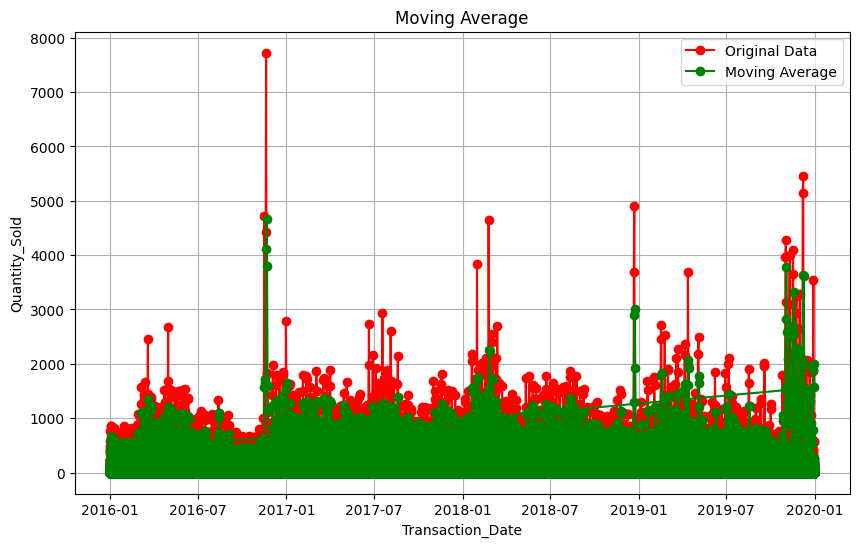

In [138]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Qty_Sold'], marker='o', label='Original Data',color="red")
plt.plot(df['Date'], df['Moving_Average'], marker='o', label='Moving Average',color="green")
plt.xlabel('Transaction_Date')
plt.ylabel('Quantity_Sold')
plt.title('Moving Average')
plt.legend()
plt.grid(True)
plt.show()

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Qty_Sold'], marker='o', label='Original Data')
plt.plot(df['Date'], df['Exponential_Moving_Average'], marker='o', label='Exponential Moving Average')
plt.xlabel('Transaction_Date')
plt.ylabel('Quantity_Sold')
plt.title('Exponential Moving Average')
plt.legend()
plt.grid(True)
plt.show()

In [140]:
A = df[["Qty_Sold","year"]]

In [141]:
A

Qty_Sold  year
Transaction_Date                
2017-06-16           1.000  2017
2017-06-17           1.000  2017
2017-06-18           2.000  2017
2017-06-20           0.000  2017
2017-06-26           0.000  2017
...                    ...   ...
2019-11-03           0.194  2019
2019-11-05           0.000  2019
2019-11-06           0.313  2019
2019-11-09           0.000  2019
2019-11-12           0.000  2019

[184512 rows x 2 columns]

In [142]:
yearly_data = A.groupby('year')['Qty_Sold'].sum().reset_index()


In [143]:
plt.figure(figsize=(10, 6))
plt.bar(yearly_data['year'], yearly_data['Qty_Sold'])
plt.xlabel('Year')
plt.ylabel('Total Quantity Sold')
plt.title('Total Quantity Sold Per Year')
plt.grid(True)
plt.show()

In [144]:
yearly_data.plot(x='year', y='Qty_Sold', legend=True)

<Axes: xlabel='year'>

In [145]:
plt.plot(yearly_data['year'], yearly_data['Qty_Sold'], marker='o', linestyle='-')

In [146]:
A.plot(kind='line',linestyle="-")

<Axes: xlabel='Transaction_Date'>

In [147]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [148]:
model_holt = ExponentialSmoothing(df['Qty_Sold'], trend='add').fit(smoothing_level=0.5)
df['es'] = model_holt.fittedvalues

In [149]:
model_hw = ExponentialSmoothing(df['Qty_Sold'], trend='add', seasonal='add', seasonal_periods=3).fit(smoothing_level=0.5)
df['es_sea'] = model_hw.fittedvalues

In [150]:
df

Product_ID  Sales_Value  Qty_Sold  Total_Transactions   
Transaction_Date                                                          
2017-06-16            100701       44.100     1.000               397.0  \
2017-06-17            100701       49.000     1.000              1275.0   
2017-06-18            100701       93.100     2.000              1165.0   
2017-06-20            100701        0.000     0.000               389.0   
2017-06-26            100701        0.000     0.000               780.0   
...                      ...          ...       ...                 ...   
2019-11-03            101200       28.906     0.194               975.0   
2019-11-05            101200        0.000     0.000               314.0   
2019-11-06            101200       46.637     0.313               605.0   
2019-11-09            101200        0.000     0.000              1024.0   
2019-11-12            101200        0.000     0.000               290.0   

                  Wastage_QTY  Wastage_Value  Product_Description   Category   
Transaction_Date                                                               
2017-06-16              0.000         0.0000  Almond Fresh Punnet      Fruit  \
2017-06-17              0.000         0.0000  Almond Fresh Punnet      Fruit   
2017-06-18              0.000         0.0000  Almond Fresh Punnet      Fruit   
2017-06-20             -4.000      -152.0000  Almond Fresh Punnet      Fruit   
2017-06-26             -1.000       -38.0000  Almond Fresh Punnet      Fruit   
...                       ...            ...                  ...        ...   
2019-11-03              0.000         0.0000      Zucchini Yellow  Vegetable   
2019-11-05             -1.298       -92.7482      Zucchini Yellow  Vegetable   
2019-11-06              0.000         0.0000      Zucchini Yellow  Vegetable   
2019-11-09             -4.200      -300.1097      Zucchini Yellow  Vegetable   
2019-11-12             -3.487      -249.1625      Zucchini Yellow  Vegetable   

                   Seasonality SubCategory  Shelf Life in days       Date   
Transaction_Date                                                            
2017-06-16            Seasonal      Almond                  10 2017-06-16  \
2017-06-17            Seasonal      Almond                  10 2017-06-17   
2017-06-18            Seasonal      Almond                  10 2017-06-18   
2017-06-20            Seasonal      Almond                  10 2017-06-20   
2017-06-26            Seasonal      Almond                  10 2017-06-26   
...                        ...         ...                 ...        ...   
2019-11-03        Non Seasonal    Zucchini                   5 2019-11-03   
2019-11-05        Non Seasonal    Zucchini                   5 2019-11-05   
2019-11-06        Non Seasonal    Zucchini                   5 2019-11-06   
2019-11-09        Non Seasonal    Zucchini                   5 2019-11-09   
2019-11-12        Non Seasonal    Zucchini                   5 2019-11-12   

                  year  Day  month  day_of_week  Moving_Average   
Transaction_Date                                                  
2017-06-16        2017   16      6            4        1.000000  \
2017-06-17        2017   17      6            5        1.000000   
2017-06-18        2017   18      6            6        1.333333   
2017-06-20        2017   20      6            1        1.000000   
2017-06-26        2017   26      6            0        0.666667   
...                ...  ...    ...          ...             ...   
2019-11-03        2019    3     11            6        0.734000   
2019-11-05        2019    5     11            1        0.232667   
2019-11-06        2019    6     11            2        0.169000   
2019-11-09        2019    9     11            5        0.104333   
2019-11-12        2019   12     11            1        0.104333   

                  Exponential_Moving_Average        es    es_sea  
Transaction_Date                                            

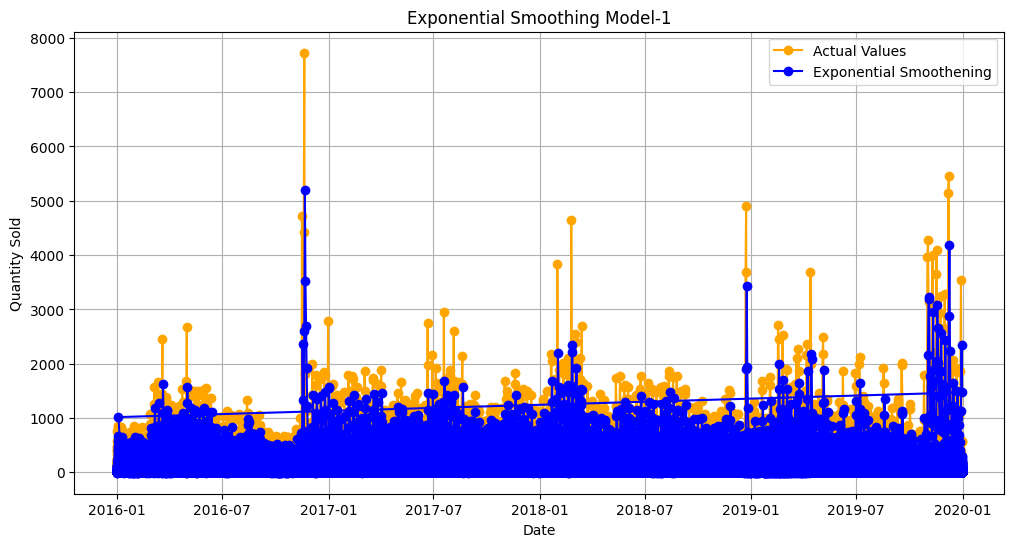

In [151]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Qty_Sold'], marker='o', label='Actual Values',color="orange")
plt.plot(df.index, df['es'], marker='o', label="Exponential Smoothening",color="blue")
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.title('Exponential Smoothing Model-1')
plt.legend()
plt.grid(True)
plt.show()

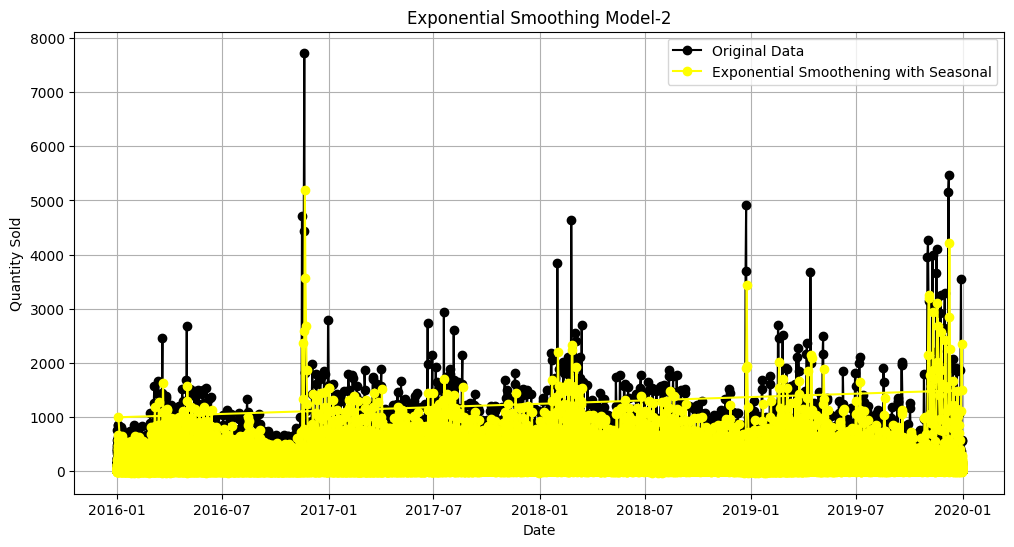

In [152]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Qty_Sold'], marker='o', label='Original Data',color='black')
plt.plot(df.index, df['es_sea'], marker='o', label="Exponential Smoothening with Seasonal",color="yellow")
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.title('Exponential Smoothing Model-2')
plt.legend()
plt.grid(True)
plt.show()